In [1]:
import numpy as np
from scipy import stats
import scipy
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


По данным опроса, 75% работников ресторанов утверждают, что испытывают на работе существенный стресс, оказывающий негативное влияние на их личную жизнь. Крупная ресторанная сеть опрашивает 100 своих работников, чтобы выяснить, отличается ли уровень стресса работников в их ресторанах от среднего. 67 из 100 работников отметили высокий уровень стресса.

Посчитайте достигаемый уровень значимости, округлите ответ до четырёх знаков после десятичной точки.

In [2]:
n = 100
F_H0 = stats.binom(n, 0.5)


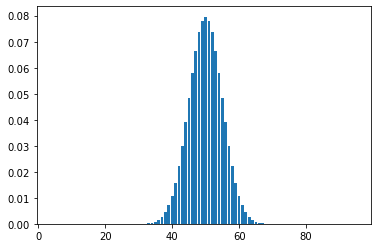

In [3]:
x = np.linspace(0,99,100)
pylab.bar(x, F_H0.pmf(x), align = 'center')
xlim(-0.5, 99.5) 
pylab.show()

In [4]:
# Уровень значимости
stats.binom_test(67, 100, 0.75, alternative = 'two-sided')

0.08222258891386608

Представим теперь, что в другой ресторанной сети только 22 из 50 работников испытывают существенный стресс. Гипотеза о том, что 22/50 соответствует 75% по всей популяции, методом, который вы использовали в предыдущей задаче, отвергается. Чем это может объясняться? Выберите все возможные варианты.

In [5]:
stats.binom_test(32, 50, 0.75, alternative = 'two-sided')

0.10037920682387033

The Wage Tract — заповедник в округе Тома, Джорджия, США, деревья в котором не затронуты деятельностью человека со времён первых поселенцев. Для участка заповедника размером 200х200 м имеется информация о координатах сосен (sn — координата в направлении север-юг, we — в направлении запад-восток, обе от 0 до 200).
Проверим, можно ли пространственное распределение сосен считать равномерным, или они растут кластерами.

Загрузите данные, поделите участок на 5х5 одинаковых квадратов размера 40x40 м, посчитайте количество сосен в каждом квадрате (чтобы получить такой же результат, как у нас, используйте функцию scipy.stats.binned_statistic_2d).

Если сосны действительно растут равномерно, какое среднее ожидаемое количество сосен в каждом квадрате? В правильном ответе два знака после десятичной точки.

In [5]:
data = pd.read_csv('pines.txt', sep="\t")


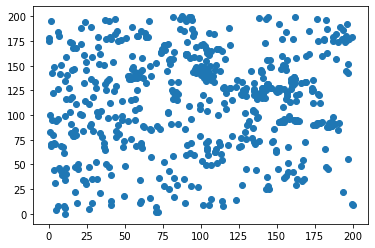

In [6]:
pylab.scatter(data.sn, data.we)

In [7]:
xbins = np.arange(0, 240, 40)
ybins = np.arange(0, 240, 40)
ret = stats.binned_statistic_2d(data.sn,data.we, None,'count',bins=[xbins, ybins])

In [8]:
ret.statistic.mean()
# len(ret.statistic.reshape(25,))
# max(ret.statistic.reshape(25,))
x = ret.statistic.reshape(25,)
x

array([18., 26., 29., 25., 20., 14., 12., 22., 34., 25., 12., 24., 15.,
       50., 37.,  8., 19., 31., 50.,  7.,  7.,  8., 37., 27., 27.])

In [11]:
y = []
y = [23.36]*25

In [12]:
res = scipy.stats.chisquare(x,y,ddof = 0)
res

Power_divergenceResult(statistic=150.58904109589042, pvalue=2.574669774967279e-20)

In [15]:
# Критерий Пирсона
stats.chi2.pdf(150.58904109589042 , 24)

1.1020887998139129e-20